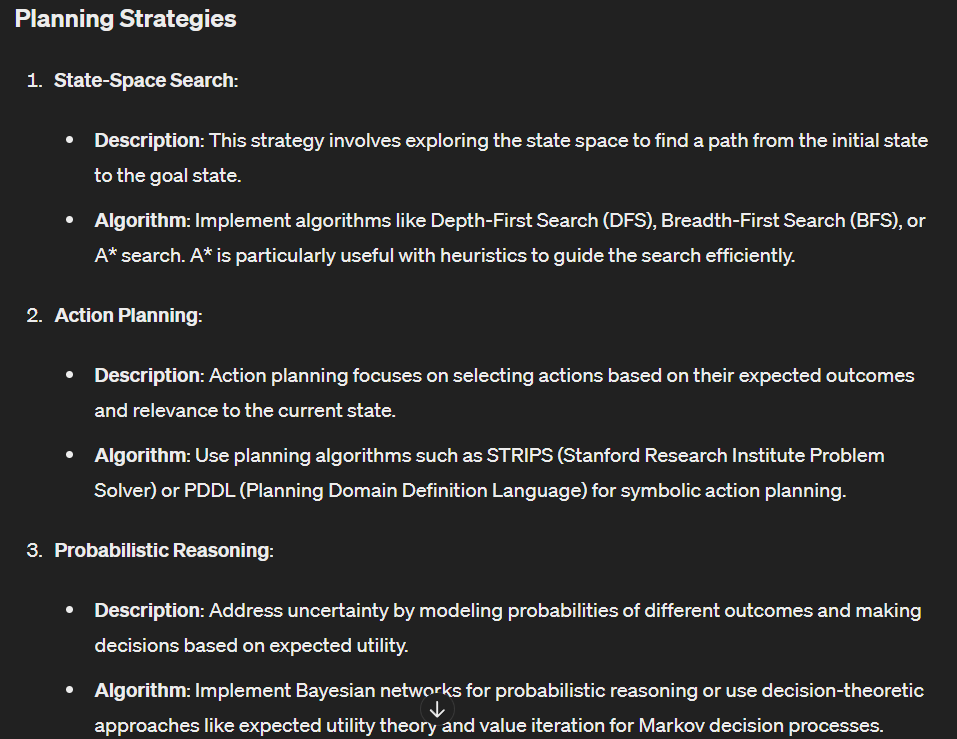

#Action Planning:

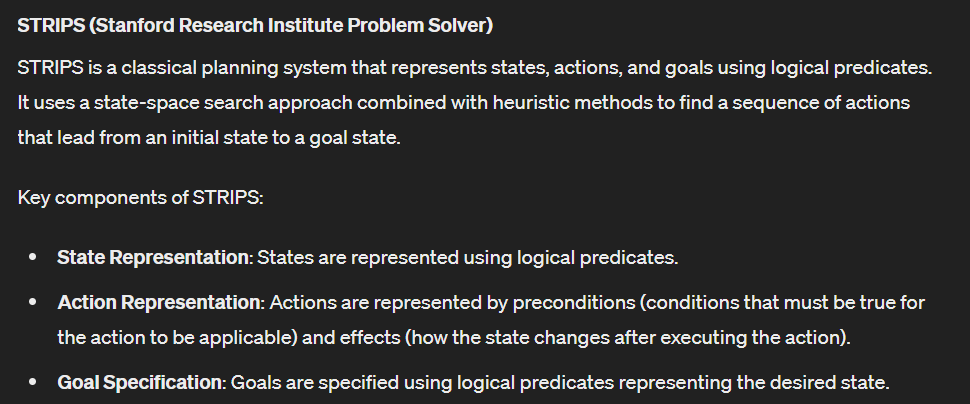

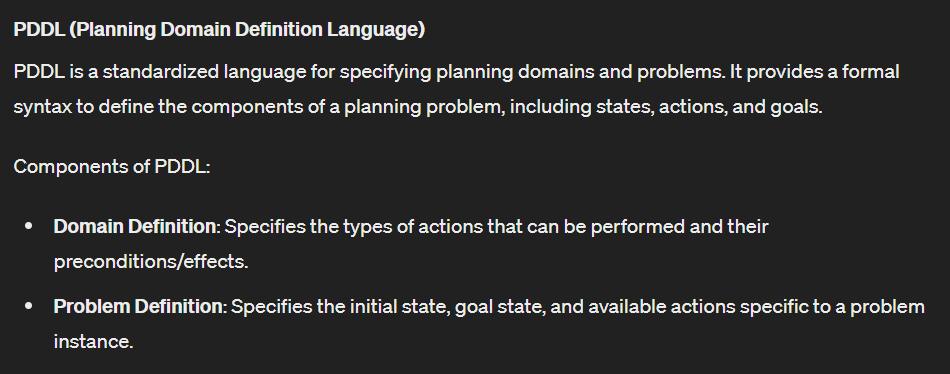

In [1]:
!pip install pyperplan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 1.7 MB/s eta 0:00:00


In [2]:
%%writefile domain.pddl
(define (domain simple-domain)
  (:requirements :strips)
  (:predicates
    (at ?obj ?loc)
    (holding ?obj)
  )
  (:action pick-up
    :parameters (?obj ?loc)
    :precondition (at ?obj ?loc)
    :effect (and (holding ?obj) (not (at ?obj ?loc)))
  )
  (:action move
    :parameters (?obj ?from ?to)
    :precondition (and (holding ?obj) (at ?obj ?from))
    :effect (and (at ?obj ?to) (not (at ?obj ?from)))
  )
)

Writing domain.pddl


In [3]:
%%writefile problem.pddl
(define (problem simple-problem)
  (:domain simple-domain)
  (:objects
    book - object
    room-a room-b - location
  )
  (:init
    (at book room-a)
    (at book room-b)
    (at book room-a)
    (at book room-b)
  )
  (:goal (and
    (at book room-b)
    (holding book)
  ))
)

Writing problem.pddl


In [ ]:
from pyperplan import pyperplan

# Load domain and problem files
domain_file = 'domain.pddl'
problem_file = 'problem.pddl'

# Create a planner instance with FastDownward
planner = pyperplan.Planner('fast-downward', verbose=2)

# Run the planner
plan, _ = planner.run(domain_file, problem_file)

# Print the generated plan
if plan:
    print("Generated Plan:")
    for step in plan:
        print(step)
else:
    print("No plan found.")

#Probabilistic Reasoning

In [6]:
!pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylin

In [7]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

# Define the structure of the Bayesian network
model = BayesianModel([('D', 'T'), ('L', 'T')])

# Define Conditional Probability Distributions (CPDs)
cpd_d = TabularCPD(variable='D', variable_card=2, values=[[0.6], [0.4]])
cpd_l = TabularCPD(variable='L', variable_card=2, values=[[0.8], [0.2]])
cpd_t = TabularCPD(variable='T', variable_card=2,
                   values=[[0.9, 0.6, 0.7, 0.1],
                           [0.1, 0.4, 0.3, 0.9]],
                   evidence=['D', 'L'], evidence_card=[2, 2])

# Add CPDs to the model
model.add_cpds(cpd_d, cpd_l, cpd_t)

# Perform Variable Elimination for inference
infer = VariableElimination(model)

# Compute probability of T given evidence
result = infer.query(variables=['T'], evidence={'D': 1, 'L': 0})
print(result)

+------+----------+
| T    |   phi(T) |
+======+==========+
| T(0) |   0.7000 |
+------+----------+
| T(1) |   0.3000 |
+------+----------+


In [8]:
import numpy as np

# Define MDP parameters
num_states = 3
num_actions = 2
gamma = 0.9  # Discount factor

# Define transition probabilities (s, a, s') -> P(s' | s, a)
transition_probs = np.array([
    [[0.8, 0.2, 0.0], [1.0, 0.0, 0.0]],  # From state 0, actions 0 and 1
    [[0.0, 0.8, 0.2], [0.0, 1.0, 0.0]],  # From state 1, actions 0 and 1
    [[1.0, 0.0, 0.0], [0.8, 0.0, 0.2]]   # From state 2, actions 0 and 1
])

# Define rewards (s, a) -> R(s, a)
rewards = np.array([
    [10, 0],  # From state 0, actions 0 and 1
    [0, 0],   # From state 1, actions 0 and 1
    [0, -50]  # From state 2, actions 0 and 1
])

# Initialize value function
V = np.zeros(num_states)

# Perform value iteration to find optimal policy
num_iterations = 100
for _ in range(num_iterations):
    Q = np.zeros((num_states, num_actions))
    for s in range(num_states):
        for a in range(num_actions):
            Q[s, a] = np.sum(transition_probs[s, a] * (rewards[s, a] + gamma * V))
    V = np.max(Q, axis=1)

# Compute optimal policy
optimal_policy = np.argmax(Q, axis=1)
print("Optimal Policy:", optimal_policy)

Optimal Policy: [0 0 0]
